# DBSCAN 

## REference

In [28]:
# https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv

## Library

In [29]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

## IMport data

In [30]:
path = 'https://raw.githubusercontent.com/notfakearcher/julian/main/02_data/country_data.csv'
country = pd.read_csv(path)
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Clean data

In [31]:
# remove the first columns in the dataset
country1 = country.copy()
country1 = country1.drop(columns = 'country')


## Visualize The Data

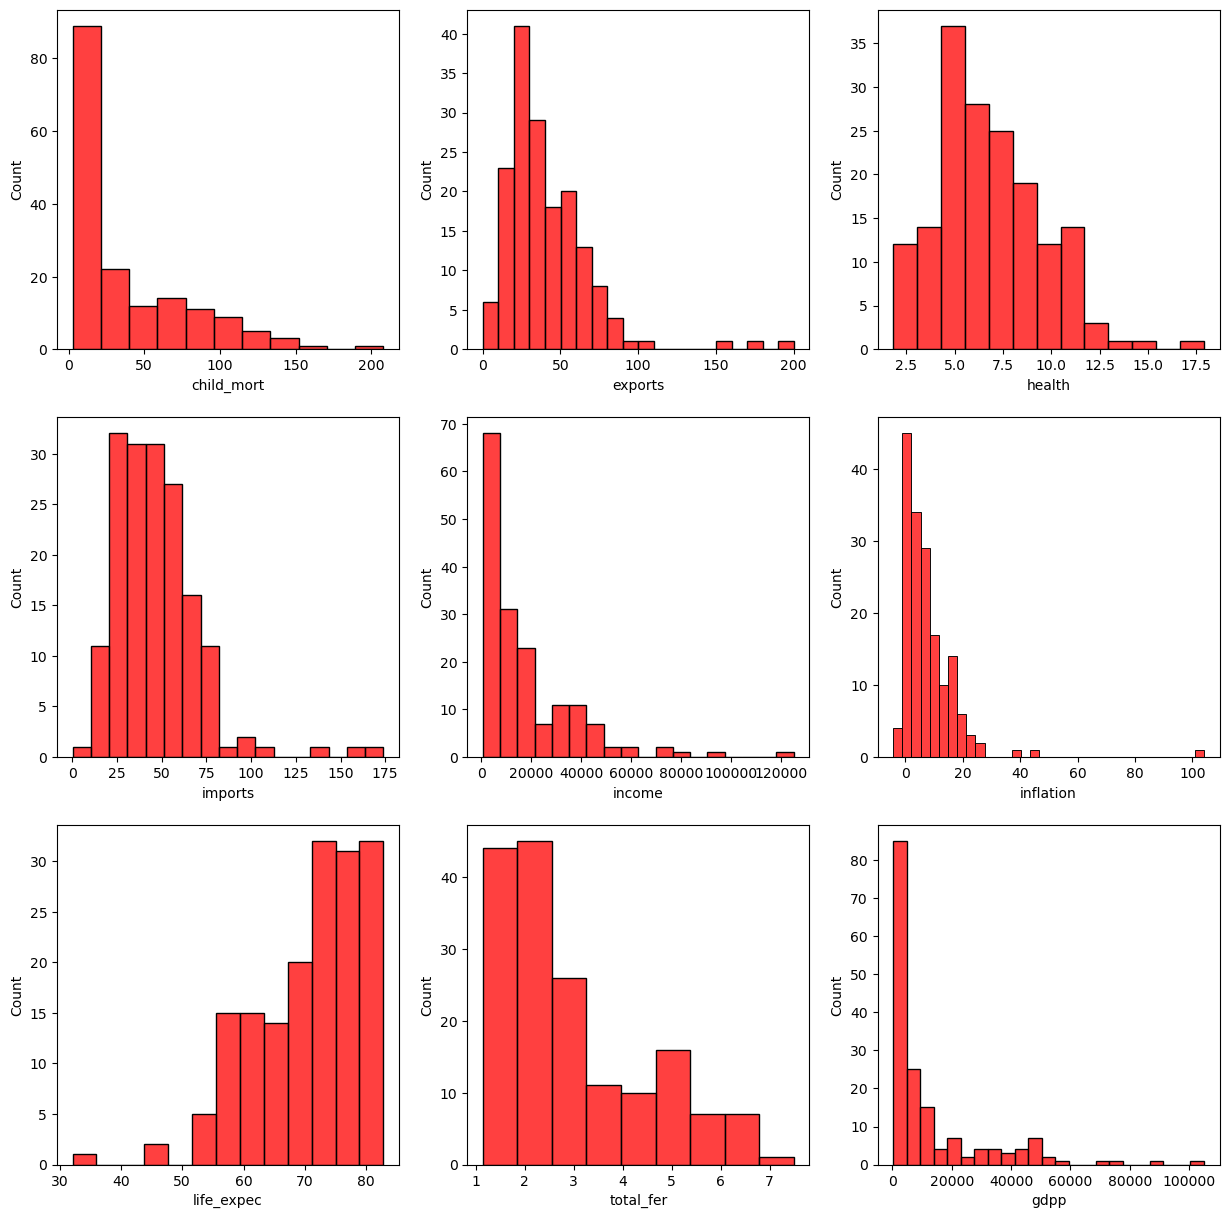

In [32]:
fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize = (15, 15))
axes = np.ravel(axes)
for c, i in enumerate(country1.columns):
  sns.histplot(ax = axes[c], data = country1, x = i, color = 'red')
plt.show()

## Normalize the dataset

In [33]:
std = StandardScaler()
country1 = std.fit_transform(country1)

## PCA

In [34]:
pca = PCA(n_components= 2)
country_reduced = pca.fit_transform(country1)
pca.explained_variance_ratio_.sum()

0.6313336543771413

## DBSCAN

In [35]:
db = DBSCAN(eps = 0.5, min_samples = 4)
db.fit(X = country_reduced)
labels = db.labels_
labels

array([ 0,  1,  1, -1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  1,  1, -1,  1,
        0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  0,  2,  1, -1,  0,  1,
        1,  1,  0,  0, -1,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1, -1,  0,
        1,  1,  2,  2,  1,  0,  1,  2,  0,  2,  1,  1,  0,  0,  1, -1,  1,
        2,  1,  1,  1,  1, -1,  1,  2,  1,  2,  1,  1,  0,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  1,  0,  0,  1,  1,  0, -1, -1,  1,  1,
        1,  1,  1,  1,  0, -1,  1,  1, -1,  2,  0, -1, -1,  1,  0,  1,  1,
        1,  1,  1,  2, -1,  1,  1,  1,  1,  1,  0,  1, -1,  0, -1,  1,  1,
        1,  1,  1,  2,  1,  1,  0,  1,  2, -1,  1,  0,  1,  0, -1,  1,  1,
        1,  1,  0,  1,  1,  2, -1,  1,  1,  1,  1, -1,  0,  0],
      dtype=int64)

## Plot the cluster

C:\Users\julia\AppData\Local\Temp\ipykernel_12556\2205535005.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot( x = country_reduced[:, 0], y = country_reduced[:, 1], hue = labels, palette = palette_liat)


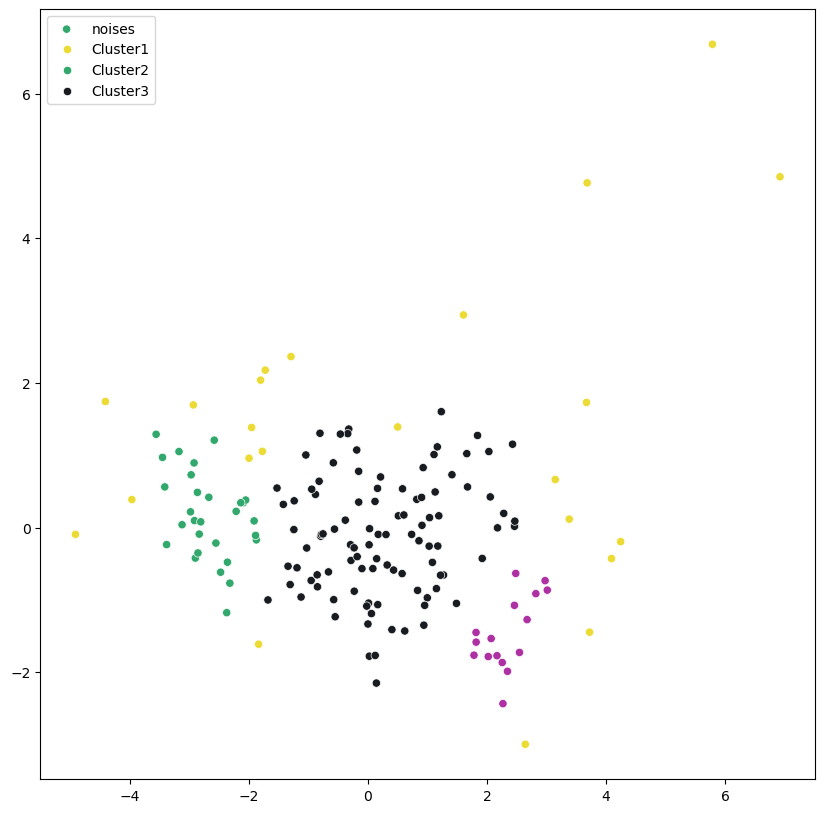

In [36]:
palette_liat = ['#ebdb34', '#32a86d', '#181c21','#ad31a3','#c90e37']
legend_list = ['noises', 'Cluster1', 'Cluster2', 'Cluster3']
fig, axes = plt.subplots(figsize = (10,10))
sns.scatterplot( x = country_reduced[:, 0], y = country_reduced[:, 1], hue = labels, palette = palette_liat)
plt.legend(legend_list)

## find the best eps which could manke the best 

In [37]:
nearest = NearestNeighbors(n_neighbors=6).fit(country_reduced)
distance, indices = nearest.kneighbors()

In [38]:
# sort distance by asscending values and plot
distance =np.sort(distance, axis = 0)
distance1 = distance[:, 5]
distance1

array([0.3107416 , 0.3119591 , 0.32822889, 0.33634955, 0.33643951,
       0.33791525, 0.3381752 , 0.34863801, 0.35042048, 0.35687068,
       0.36713988, 0.36772603, 0.3690657 , 0.37009335, 0.37086749,
       0.37408808, 0.37408808, 0.3792411 , 0.38010074, 0.38204089,
       0.38398258, 0.38419074, 0.38509484, 0.38638204, 0.38818898,
       0.38913482, 0.39221417, 0.3943605 , 0.40222106, 0.40246881,
       0.40423231, 0.41031193, 0.41069621, 0.41073562, 0.41120154,
       0.41182017, 0.41698422, 0.41822676, 0.4194752 , 0.41992172,
       0.42114248, 0.42306252, 0.42424589, 0.42889542, 0.43277853,
       0.43441595, 0.43649488, 0.43898155, 0.44534762, 0.4454558 ,
       0.44840473, 0.45338218, 0.45900599, 0.45993359, 0.4604597 ,
       0.46271104, 0.46393133, 0.4666381 , 0.46883326, 0.47062764,
       0.47347069, 0.47921421, 0.48285299, 0.48530552, 0.48545215,
       0.48545215, 0.49299617, 0.49303003, 0.49360239, 0.49492685,
       0.49825036, 0.49825036, 0.49834456, 0.49866238, 0.50364

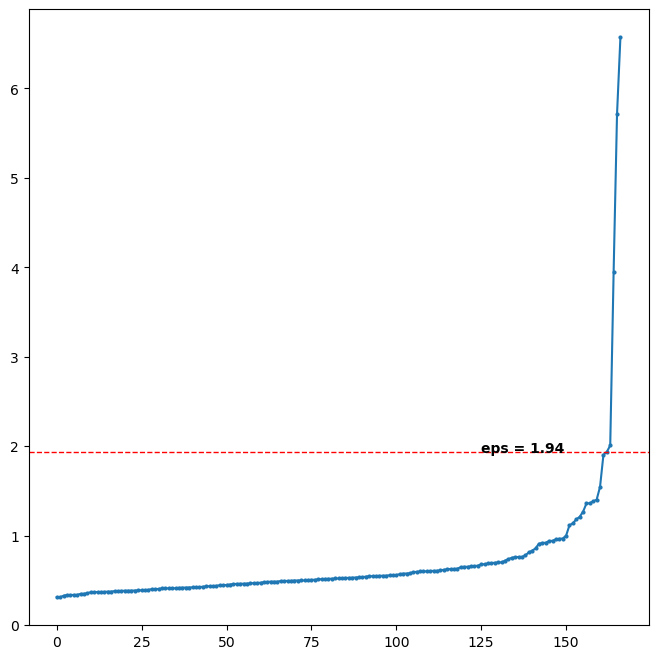

In [39]:
distance_point =  zip(distance1[0 :- 1], distance1[1 : ])
fig, axes = plt.subplots(figsize = (8,8))
# for every piont find the radiance which contain 6 neighbours
plt.plot(distance1, marker = 'o', markersize = 2)
# find the distance which has the biggest gradient :
# find thre biggest gradient point
deta = [a - b for b, a in distance_point ]
max_deta =np.argmax(deta) -1
#find the distance
eps = distance1[max_deta]
eps
plt.axhline(y = eps, color = 'red', linestyle = '--', linewidth = 1)
plt.text(x = 125, y = eps, s = 'eps = %s' %(eps.round(2)), fontweight = 'bold')
plt.show()

In [40]:
# try use DBSCAN(eps = 1.94, neightbour = 6)
dbs = DBSCAN(eps= 1.94, min_samples=6)
dbs.fit(country_reduced)
labels = dbs.labels_

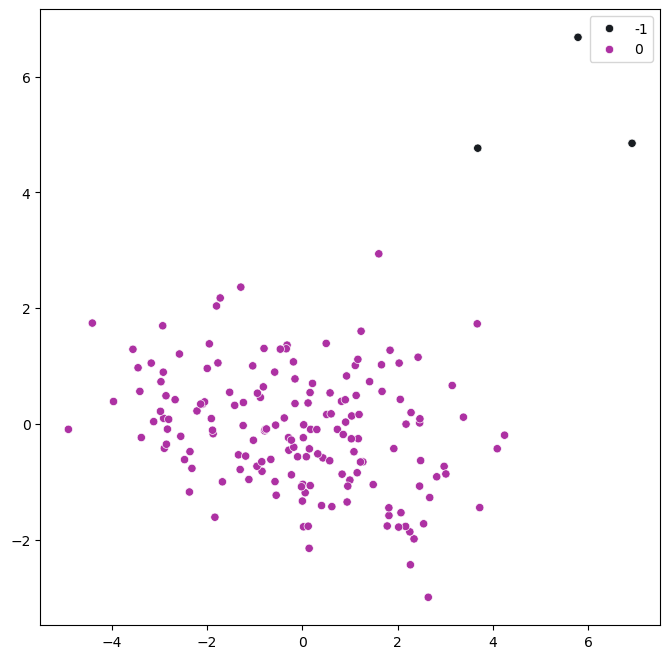

In [41]:
# plot clusters
fig, axes = plt.subplots(figsize = (8,8))
sns.scatterplot(x = country_reduced[:,0], y = country_reduced[:, 1], hue = labels, palette = palette_liat[0+2:len(np.unique(labels))+2])
plt.legend()
plt.show()

## find which country need help

In [18]:
get_country_i = np.where(labels==-1)[0]
country.loc[get_country_i, :]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [19]:
country_reduced[get_country_i,:]

array([[6.91775496, 4.84984369],
       [3.6795426 , 4.76548605],
       [5.7833763 , 6.68209028]])

In [16]:
cond = labels == -1
country_needhelp = []
for c,i in enumerate(labels):
  if i == -1:
    country_needhelp.append(country.iloc[c, 0])
country_needhelp

['Luxembourg', 'Malta', 'Singapore']